In [109]:
#install.packages("igraph")# if this failed
#install.packages("igraph", type="binary")
#install.packages("pracma", type="binary")
library(igraph)
library(Matrix)
library(pracma)

In [110]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [111]:
random_walk = function (g, num_steps, start_node, alpha, tele_prob = NULL, transition_matrix = NULL){
    if(is.null(transition_matrix)){
        transition_matrix = create_transition_matrix(g)
    }
    if(is.null(tele_prob)){
        tele_prob = rep(1/vcount(g), vcount(g))
    }
    v = start_node

    for(i in 1:num_steps){
        if(runif(1) < alpha){# teleport
            v = sample(1:vcount(g), 1, prob = tele_prob) 
            visit_nodes[v] <- visit_nodes[v] + 1
        } else {
            PMF = transition_matrix[v, ]
            v = sample(1:vcount(g), 1, prob = PMF)
        }
    }

    
    return(v)
}

## 2 Random Walk on Networks

### 3. (a)

In [112]:
set.seed(1)
numnode <- 1000
g1 <- barabasi.game(numnode, m=4, directed=T)

In [118]:
num_step <- 50

visit_nodes <- rep(0, numnode)
for (i in 1:1000) {
    v <- random_walk(g1, num_step, i, 0)
    visit_nodes[v] <- visit_nodes[v] + 1
}
visit_prob <- visit_nodes/1000
pagerank <- visit_prob

In [119]:
degree <- degree(g1)
node <- seq(1,vcount(g1),1)

pdf 
  2

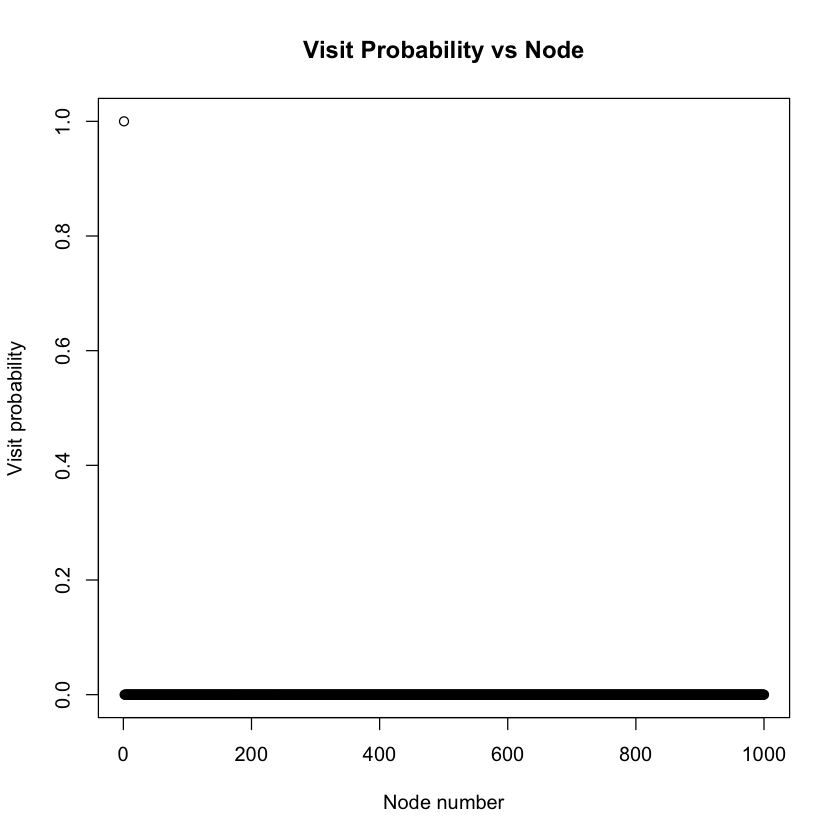

In [122]:
pdf('3_a_1.pdf')
plot(node, visit_prob, main="Visit Probability vs Node", xlab = "Node number", ylab = "Visit probability")
dev.off()
plot(node, visit_prob, main="Visit Probability vs Node", xlab = "Node number", ylab = "Visit probability")

pdf 
  2

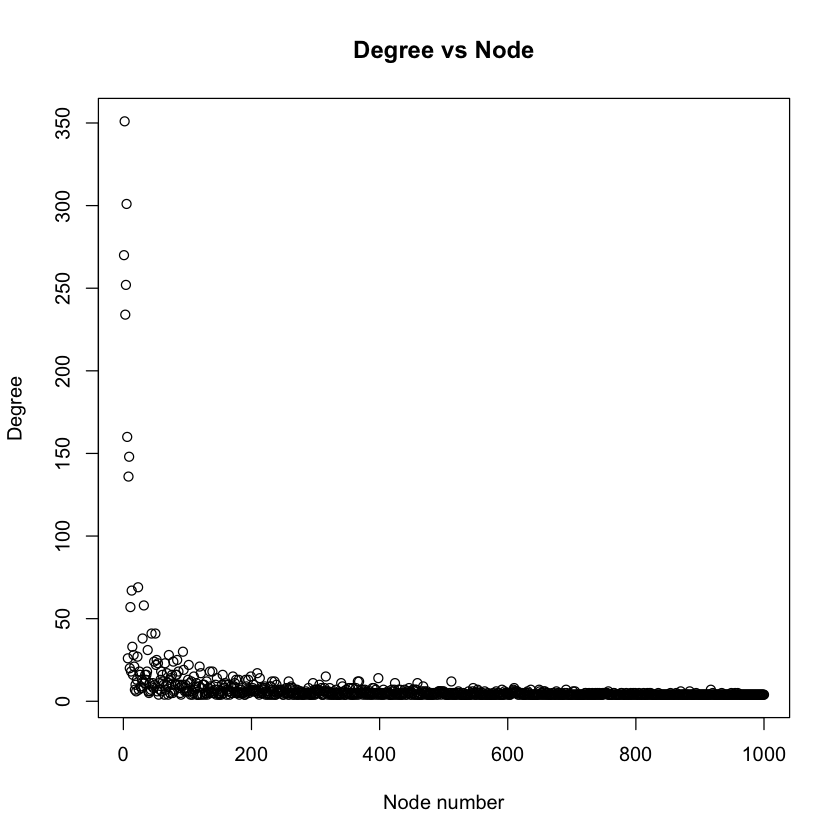

In [123]:
pdf('3_a_2.pdf')
plot(node, degree, main="Degree vs Node", xlab = "Node number", ylab = "Degree")
dev.off()
plot(node, degree, main="Degree vs Node", xlab = "Node number", ylab = "Degree")

### 3. (b)

In [124]:
num_step <- 50
teleprob = rep(1/vcount(g1), vcount(g1))
visit_nodes <- rep(0, numnode)
for (i in 1:1000) {
    for (j in 1:3){
    v <- random_walk(g1, num_step, i, 0.15, teleprob)
    visit_nodes[v] <- visit_nodes[v] + 1
    }
}
visit_prob <- visit_nodes/1000/3

pdf 
  2

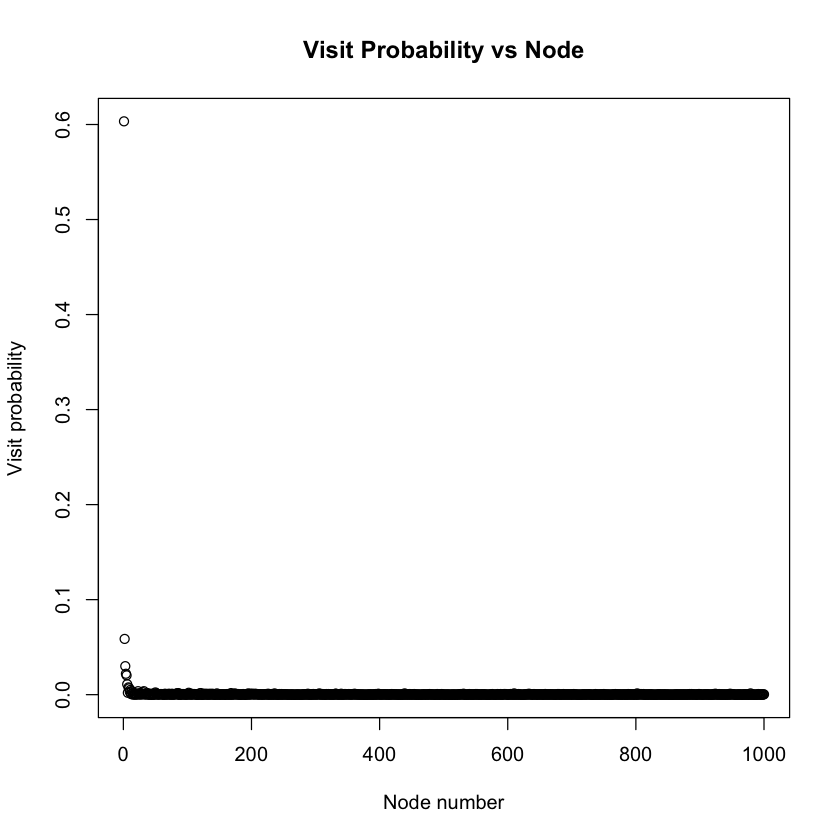

In [125]:
pdf('3_b.pdf')
plot(node, visit_prob, main="Visit Probability vs Node", xlab = "Node number", ylab = "Visit probability")
dev.off()
plot(node, visit_prob, main="Visit Probability vs Node", xlab = "Node number", ylab = "Visit probability")

### 4(a)

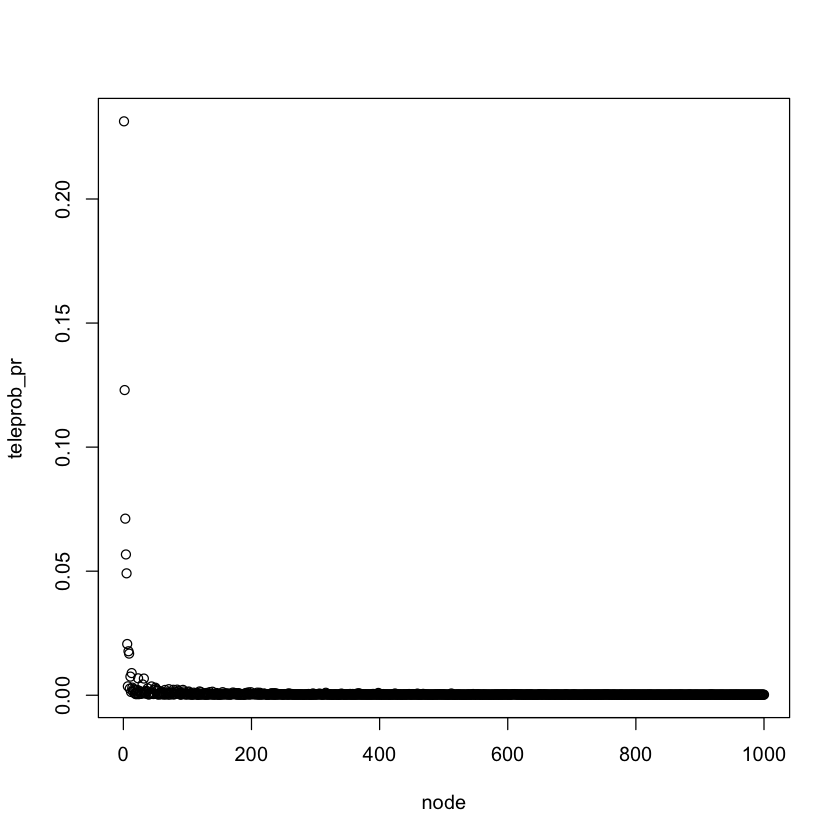

In [59]:
teleprob_pr = page_rank(g1, damping = 1)$vector
node <- seq(1,vcount(g1),1)
plot(node, teleprob_pr)

In [126]:
teleprob_pr <- pagerank

num_step <- 50
teleprob = rep(1/vcount(g1), vcount(g1))
visit_nodes <- rep(0, numnode)
for (i in 1:1000) {
    v <- random_walk(g1, num_step, i, 0.15, teleprob_pr)
    visit_nodes[v] <- visit_nodes[v] + 1
}
visit_prob <- visit_nodes/1000

pdf 
  2

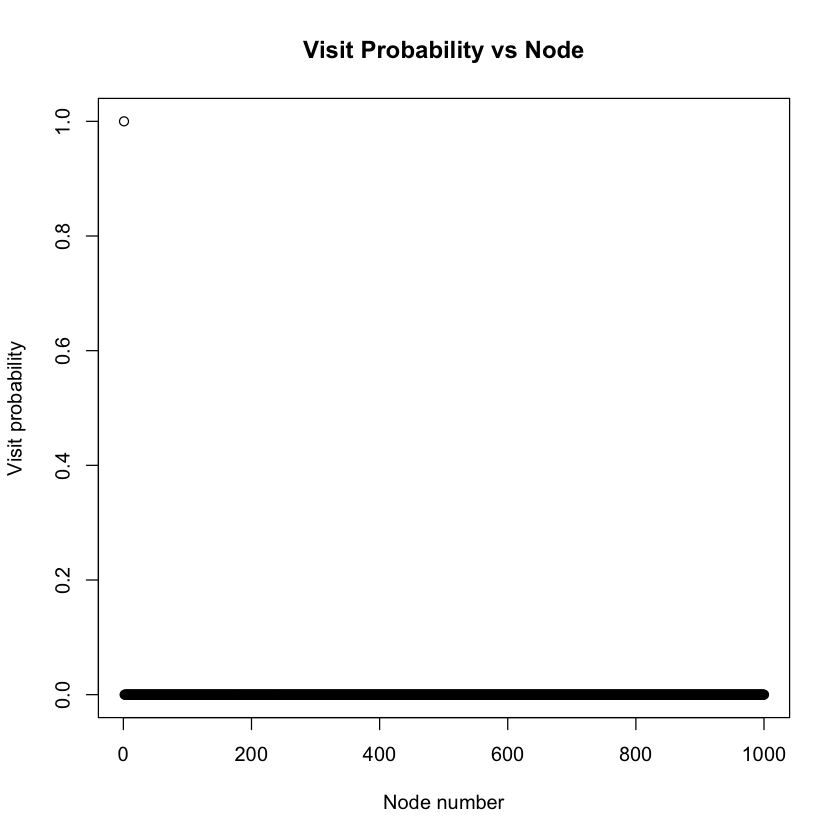

In [127]:
pdf('4_a.pdf')
plot(node, visit_prob, main="Visit Probability vs Node", xlab = "Node number", ylab = "Visit probability")
dev.off()
plot(node, visit_prob, main="Visit Probability vs Node", xlab = "Node number", ylab = "Visit probability")

### 4 (b)

In [120]:
whichmedian <- function(x) which.min(abs(x - median(x)))
median_index <- whichmedian(teleprob_pr)

In [128]:
teleprob_median_pr <- rep(0, numnode)
teleprob_median_pr[500] = 1/2
teleprob_median_pr[501] = 1/2

In [ ]:
num_step <- 100
teleprob = rep(1/vcount(g1), vcount(g1))
visit_nodes <- rep(0, numnode)
for (i in 1:1000) {
    for (j in 1:5){
        v <- random_walk(g1, num_step, i, 0.15, teleprob_median_pr)
        visit_nodes[v] <- visit_nodes[v] + 1
    }
}
visit_prob <- visit_nodes/1000/5

In [ ]:
pdf('4_b.pdf')
plot(node, visit_prob, main="Visit Probability vs Node", xlab = "Node number", ylab = "Visit probability")
dev.off()
plot(node, visit_prob, main="Visit Probability vs Node", xlab = "Node number", ylab = "Visit probability")

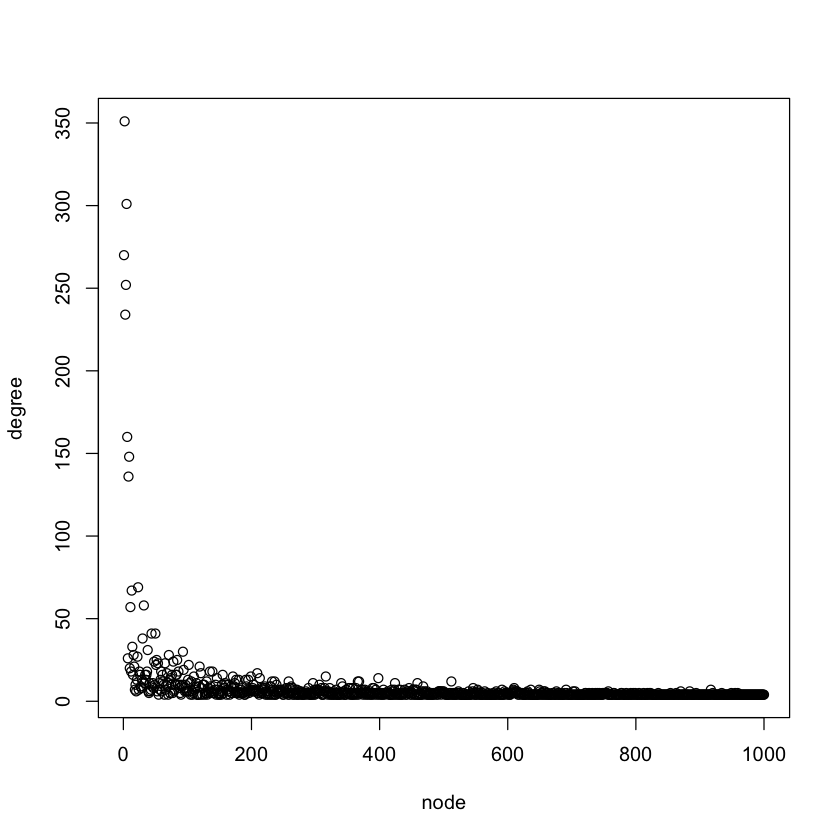

In [84]:
plot(node,degree)

In [102]:
sum(visit_prob)

[1] 1

In [108]:
visit_prob[1]+visit_prob[501]+visit_prob[500]

[1] 0.7426667